In [1]:
from __future__ import print_function
#import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD, Adam, Adadelta
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend as K

Using TensorFlow backend.


In [10]:
batch_size = 128
num_classes = 10
epochs = 100 # experiment with this
learning_rate = 0.01 # experiment with this
#num_units_layer1 = 5 # number of units in the hidden layer
# input image dimensions
img_rows, img_cols = 28, 28

In [4]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [5]:
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

y_train shape: (60000,)
y_test shape: (10000,)


In [6]:
# convert class vectors to binary class matrices
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [7]:
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

y_train shape: (60000, 10)
y_test shape: (10000, 10)


In [12]:
min , max = 1, 101
increment = 5
possible_unit_numbers = np.linspace(min, max, 1 + (max-min)/increment)
trainacc_vs_unitnumber = []
testacc_vs_unitnumber = []

In [8]:
possible_unit_numbers

array([10., 15.])

In [13]:
for num_units_layer1 in possible_unit_numbers:
    # the neural network model is described:
    model_multilayer = Sequential()
    model_multilayer.add(Flatten())
    model_multilayer.add(Dense(int(num_units_layer1), activation='relu'))
    model_multilayer.add(Dense(num_classes, activation='softmax'))
    # compile the model, choose the optimization objective function, learning rate
    
    opt = Adadelta(learning_rate=1.0)
    model_multilayer.compile(loss='categorical_crossentropy',
                             optimizer=opt,
                             metrics=['accuracy'])
    # train the model
    history = model_multilayer.fit(x=x_train, y=y_train,
                                   batch_size=batch_size,
                                   epochs=epochs,
                                   validation_data=(x_test, y_test))
  
    training_loss = history.history['loss']
    test_loss = history.history['val_loss']
    training_acc = history.history['accuracy']
    test_acc = history.history['val_accuracy']

    # save the acc after last epoch
    trainacc_vs_unitnumber.append(training_acc[-1])
    testacc_vs_unitnumber.append(test_acc[-1])

    del model_multilayer

Epoch 1/100
469/469 [==============================] - 1s 2ms/step - loss: 2.0703 - accuracy: 0.2040 - val_loss: 1.9630 - val_accuracy: 0.2223
Epoch 2/100
469/469 [==============================] - 1s 2ms/step - loss: 1.9257 - accuracy: 0.2300 - val_loss: 1.8747 - val_accuracy: 0.2385
Epoch 3/100
469/469 [==============================] - 1s 1ms/step - loss: 1.8504 - accuracy: 0.2430 - val_loss: 1.8116 - val_accuracy: 0.2504
Epoch 4/100
469/469 [==============================] - 1s 1ms/step - loss: 1.8027 - accuracy: 0.2482 - val_loss: 1.7802 - val_accuracy: 0.2644
Epoch 5/100
469/469 [==============================] - 1s 1ms/step - loss: 1.7734 - accuracy: 0.2558 - val_loss: 1.7531 - val_accuracy: 0.2637
Epoch 6/100
469/469 [==============================] - 1s 1ms/step - loss: 1.7531 - accuracy: 0.2623 - val_loss: 1.7381 - val_accuracy: 0.2668
Epoch 7/100
469/469 [==============================] - 1s 1ms/step - loss: 1.7370 - accuracy: 0.2769 - val_loss: 1.7241 - val_accuracy: 0.3029

Epoch 58/100
469/469 [==============================] - 1s 2ms/step - loss: 1.5906 - accuracy: 0.3843 - val_loss: 1.6058 - val_accuracy: 0.3752
Epoch 59/100
469/469 [==============================] - 1s 2ms/step - loss: 1.5899 - accuracy: 0.3831 - val_loss: 1.6162 - val_accuracy: 0.3770
Epoch 60/100
469/469 [==============================] - 1s 1ms/step - loss: 1.5897 - accuracy: 0.3857 - val_loss: 1.6047 - val_accuracy: 0.3792
Epoch 61/100
469/469 [==============================] - 1s 1ms/step - loss: 1.5894 - accuracy: 0.3833 - val_loss: 1.6070 - val_accuracy: 0.3851
Epoch 62/100
469/469 [==============================] - 1s 2ms/step - loss: 1.5887 - accuracy: 0.3850 - val_loss: 1.6094 - val_accuracy: 0.3756
Epoch 63/100
469/469 [==============================] - 1s 1ms/step - loss: 1.5891 - accuracy: 0.3865 - val_loss: 1.6036 - val_accuracy: 0.3850
Epoch 64/100
469/469 [==============================] - 1s 1ms/step - loss: 1.5886 - accuracy: 0.3864 - val_loss: 1.6075 - val_accuracy:

Epoch 15/100
469/469 [==============================] - 1s 2ms/step - loss: 0.3127 - accuracy: 0.9107 - val_loss: 0.3213 - val_accuracy: 0.9108
Epoch 16/100
469/469 [==============================] - 1s 1ms/step - loss: 0.3111 - accuracy: 0.9115 - val_loss: 0.3239 - val_accuracy: 0.9108
Epoch 17/100
469/469 [==============================] - 1s 1ms/step - loss: 0.3089 - accuracy: 0.9122 - val_loss: 0.3203 - val_accuracy: 0.9102
Epoch 18/100
469/469 [==============================] - 1s 1ms/step - loss: 0.3076 - accuracy: 0.9131 - val_loss: 0.3188 - val_accuracy: 0.9116
Epoch 19/100
469/469 [==============================] - 1s 1ms/step - loss: 0.3061 - accuracy: 0.9132 - val_loss: 0.3198 - val_accuracy: 0.9113
Epoch 20/100
469/469 [==============================] - 1s 2ms/step - loss: 0.3046 - accuracy: 0.9133 - val_loss: 0.3163 - val_accuracy: 0.9139
Epoch 21/100
469/469 [==============================] - 1s 2ms/step - loss: 0.3034 - accuracy: 0.9148 - val_loss: 0.3187 - val_accuracy:

Epoch 72/100
469/469 [==============================] - 1s 1ms/step - loss: 0.2780 - accuracy: 0.9228 - val_loss: 0.3119 - val_accuracy: 0.9144
Epoch 73/100
469/469 [==============================] - 1s 2ms/step - loss: 0.2776 - accuracy: 0.9225 - val_loss: 0.3094 - val_accuracy: 0.9169
Epoch 74/100
469/469 [==============================] - 1s 2ms/step - loss: 0.2778 - accuracy: 0.9218 - val_loss: 0.3141 - val_accuracy: 0.9157
Epoch 75/100
469/469 [==============================] - 1s 1ms/step - loss: 0.2776 - accuracy: 0.9223 - val_loss: 0.3112 - val_accuracy: 0.9144
Epoch 76/100
469/469 [==============================] - 1s 1ms/step - loss: 0.2772 - accuracy: 0.9224 - val_loss: 0.3077 - val_accuracy: 0.9153
Epoch 77/100
469/469 [==============================] - 1s 1ms/step - loss: 0.2769 - accuracy: 0.9220 - val_loss: 0.3118 - val_accuracy: 0.9149
Epoch 78/100
469/469 [==============================] - 1s 1ms/step - loss: 0.2767 - accuracy: 0.9227 - val_loss: 0.3114 - val_accuracy:

Epoch 29/100
469/469 [==============================] - 1s 1ms/step - loss: 0.2016 - accuracy: 0.9425 - val_loss: 0.2405 - val_accuracy: 0.9325
Epoch 30/100
469/469 [==============================] - 1s 1ms/step - loss: 0.2005 - accuracy: 0.9438 - val_loss: 0.2400 - val_accuracy: 0.9315
Epoch 31/100
469/469 [==============================] - 1s 2ms/step - loss: 0.1994 - accuracy: 0.9430 - val_loss: 0.2331 - val_accuracy: 0.9340
Epoch 32/100
469/469 [==============================] - 1s 2ms/step - loss: 0.1985 - accuracy: 0.9438 - val_loss: 0.2356 - val_accuracy: 0.9326
Epoch 33/100
469/469 [==============================] - 1s 1ms/step - loss: 0.1972 - accuracy: 0.9447 - val_loss: 0.2359 - val_accuracy: 0.9342
Epoch 34/100
469/469 [==============================] - 1s 1ms/step - loss: 0.1965 - accuracy: 0.9449 - val_loss: 0.2389 - val_accuracy: 0.9343
Epoch 35/100
469/469 [==============================] - 1s 1ms/step - loss: 0.1953 - accuracy: 0.9449 - val_loss: 0.2353 - val_accuracy:

Epoch 86/100
469/469 [==============================] - 1s 1ms/step - loss: 0.1635 - accuracy: 0.9532 - val_loss: 0.2286 - val_accuracy: 0.9389
Epoch 87/100
469/469 [==============================] - 1s 1ms/step - loss: 0.1625 - accuracy: 0.9534 - val_loss: 0.2300 - val_accuracy: 0.9373
Epoch 88/100
469/469 [==============================] - 1s 1ms/step - loss: 0.1622 - accuracy: 0.9533 - val_loss: 0.2261 - val_accuracy: 0.9394
Epoch 89/100
469/469 [==============================] - 1s 1ms/step - loss: 0.1619 - accuracy: 0.9540 - val_loss: 0.2249 - val_accuracy: 0.9387
Epoch 90/100
469/469 [==============================] - 1s 2ms/step - loss: 0.1616 - accuracy: 0.9535 - val_loss: 0.2274 - val_accuracy: 0.9397
Epoch 91/100
469/469 [==============================] - 1s 1ms/step - loss: 0.1611 - accuracy: 0.9536 - val_loss: 0.2271 - val_accuracy: 0.9387
Epoch 92/100
469/469 [==============================] - 1s 1ms/step - loss: 0.1614 - accuracy: 0.9535 - val_loss: 0.2266 - val_accuracy:

Epoch 43/100
469/469 [==============================] - 1s 2ms/step - loss: 0.1133 - accuracy: 0.9673 - val_loss: 0.1614 - val_accuracy: 0.9544
Epoch 44/100
469/469 [==============================] - 1s 2ms/step - loss: 0.1125 - accuracy: 0.9677 - val_loss: 0.1607 - val_accuracy: 0.9543
Epoch 45/100
469/469 [==============================] - 1s 2ms/step - loss: 0.1113 - accuracy: 0.9683 - val_loss: 0.1668 - val_accuracy: 0.9540
Epoch 46/100
469/469 [==============================] - 1s 1ms/step - loss: 0.1108 - accuracy: 0.9682 - val_loss: 0.1591 - val_accuracy: 0.9548
Epoch 47/100
469/469 [==============================] - 1s 1ms/step - loss: 0.1101 - accuracy: 0.9686 - val_loss: 0.1622 - val_accuracy: 0.9549
Epoch 48/100
469/469 [==============================] - 1s 1ms/step - loss: 0.1089 - accuracy: 0.9686 - val_loss: 0.1608 - val_accuracy: 0.9548
Epoch 49/100
469/469 [==============================] - 1s 1ms/step - loss: 0.1081 - accuracy: 0.9686 - val_loss: 0.1625 - val_accuracy:

Epoch 100/100
469/469 [==============================] - 1s 1ms/step - loss: 0.0857 - accuracy: 0.9758 - val_loss: 0.1820 - val_accuracy: 0.9532
Epoch 1/100
469/469 [==============================] - 1s 2ms/step - loss: 0.5032 - accuracy: 0.8650 - val_loss: 0.2914 - val_accuracy: 0.9169
Epoch 2/100
469/469 [==============================] - 1s 1ms/step - loss: 0.2780 - accuracy: 0.9211 - val_loss: 0.2473 - val_accuracy: 0.9300
Epoch 3/100
469/469 [==============================] - 1s 1ms/step - loss: 0.2446 - accuracy: 0.9310 - val_loss: 0.2303 - val_accuracy: 0.9345
Epoch 4/100
469/469 [==============================] - 1s 1ms/step - loss: 0.2232 - accuracy: 0.9370 - val_loss: 0.2172 - val_accuracy: 0.9383
Epoch 5/100
469/469 [==============================] - 1s 1ms/step - loss: 0.2066 - accuracy: 0.9415 - val_loss: 0.2050 - val_accuracy: 0.9430
Epoch 6/100
469/469 [==============================] - 1s 1ms/step - loss: 0.1925 - accuracy: 0.9457 - val_loss: 0.1967 - val_accuracy: 0.94

Epoch 57/100
469/469 [==============================] - 1s 1ms/step - loss: 0.0675 - accuracy: 0.9807 - val_loss: 0.1299 - val_accuracy: 0.9631
Epoch 58/100
469/469 [==============================] - 1s 1ms/step - loss: 0.0673 - accuracy: 0.9804 - val_loss: 0.1298 - val_accuracy: 0.9635
Epoch 59/100
469/469 [==============================] - 1s 1ms/step - loss: 0.0665 - accuracy: 0.9811 - val_loss: 0.1310 - val_accuracy: 0.9631
Epoch 60/100
469/469 [==============================] - 1s 1ms/step - loss: 0.0660 - accuracy: 0.9813 - val_loss: 0.1298 - val_accuracy: 0.9638
Epoch 61/100
469/469 [==============================] - 1s 2ms/step - loss: 0.0653 - accuracy: 0.9815 - val_loss: 0.1295 - val_accuracy: 0.9640
Epoch 62/100
469/469 [==============================] - 1s 1ms/step - loss: 0.0650 - accuracy: 0.9814 - val_loss: 0.1312 - val_accuracy: 0.9625
Epoch 63/100
469/469 [==============================] - 1s 2ms/step - loss: 0.0646 - accuracy: 0.9813 - val_loss: 0.1325 - val_accuracy:

Epoch 14/100
469/469 [==============================] - 1s 1ms/step - loss: 0.1041 - accuracy: 0.9702 - val_loss: 0.1253 - val_accuracy: 0.9643
Epoch 15/100
469/469 [==============================] - 1s 1ms/step - loss: 0.1001 - accuracy: 0.9715 - val_loss: 0.1231 - val_accuracy: 0.9643
Epoch 16/100
469/469 [==============================] - 1s 1ms/step - loss: 0.0971 - accuracy: 0.9722 - val_loss: 0.1235 - val_accuracy: 0.9653
Epoch 17/100
469/469 [==============================] - 1s 1ms/step - loss: 0.0941 - accuracy: 0.9724 - val_loss: 0.1205 - val_accuracy: 0.9638
Epoch 18/100
469/469 [==============================] - 1s 1ms/step - loss: 0.0910 - accuracy: 0.9735 - val_loss: 0.1200 - val_accuracy: 0.9652
Epoch 19/100
469/469 [==============================] - 1s 1ms/step - loss: 0.0885 - accuracy: 0.9748 - val_loss: 0.1233 - val_accuracy: 0.9639
Epoch 20/100
469/469 [==============================] - 1s 1ms/step - loss: 0.0859 - accuracy: 0.9750 - val_loss: 0.1190 - val_accuracy:

Epoch 71/100
469/469 [==============================] - 1s 1ms/step - loss: 0.0384 - accuracy: 0.9895 - val_loss: 0.1419 - val_accuracy: 0.9657
Epoch 72/100
469/469 [==============================] - 1s 1ms/step - loss: 0.0377 - accuracy: 0.9896 - val_loss: 0.1364 - val_accuracy: 0.9674
Epoch 73/100
469/469 [==============================] - 1s 1ms/step - loss: 0.0373 - accuracy: 0.9899 - val_loss: 0.1391 - val_accuracy: 0.9661
Epoch 74/100
469/469 [==============================] - 1s 1ms/step - loss: 0.0368 - accuracy: 0.9901 - val_loss: 0.1371 - val_accuracy: 0.9666
Epoch 75/100
469/469 [==============================] - 1s 1ms/step - loss: 0.0359 - accuracy: 0.9903 - val_loss: 0.1431 - val_accuracy: 0.9648
Epoch 76/100
469/469 [==============================] - 1s 1ms/step - loss: 0.0358 - accuracy: 0.9905 - val_loss: 0.1446 - val_accuracy: 0.9657
Epoch 77/100
469/469 [==============================] - 1s 1ms/step - loss: 0.0355 - accuracy: 0.9904 - val_loss: 0.1437 - val_accuracy:

Epoch 28/100
469/469 [==============================] - 1s 1ms/step - loss: 0.0613 - accuracy: 0.9824 - val_loss: 0.1131 - val_accuracy: 0.9645
Epoch 29/100
469/469 [==============================] - 1s 2ms/step - loss: 0.0596 - accuracy: 0.9831 - val_loss: 0.1127 - val_accuracy: 0.9671
Epoch 30/100
469/469 [==============================] - 1s 2ms/step - loss: 0.0585 - accuracy: 0.9832 - val_loss: 0.1123 - val_accuracy: 0.9671
Epoch 31/100
469/469 [==============================] - 1s 2ms/step - loss: 0.0570 - accuracy: 0.9839 - val_loss: 0.1154 - val_accuracy: 0.9661
Epoch 32/100
469/469 [==============================] - 1s 1ms/step - loss: 0.0556 - accuracy: 0.9841 - val_loss: 0.1118 - val_accuracy: 0.9683
Epoch 33/100
469/469 [==============================] - 1s 2ms/step - loss: 0.0543 - accuracy: 0.9848 - val_loss: 0.1163 - val_accuracy: 0.9659
Epoch 34/100
469/469 [==============================] - 1s 2ms/step - loss: 0.0533 - accuracy: 0.9852 - val_loss: 0.1109 - val_accuracy:

Epoch 85/100
469/469 [==============================] - 1s 1ms/step - loss: 0.0206 - accuracy: 0.9953 - val_loss: 0.1432 - val_accuracy: 0.9656
Epoch 86/100
469/469 [==============================] - 1s 1ms/step - loss: 0.0203 - accuracy: 0.9955 - val_loss: 0.1437 - val_accuracy: 0.9645
Epoch 87/100
469/469 [==============================] - 1s 1ms/step - loss: 0.0199 - accuracy: 0.9955 - val_loss: 0.1440 - val_accuracy: 0.9664
Epoch 88/100
469/469 [==============================] - 1s 1ms/step - loss: 0.0196 - accuracy: 0.9956 - val_loss: 0.1495 - val_accuracy: 0.9650
Epoch 89/100
469/469 [==============================] - 1s 1ms/step - loss: 0.0190 - accuracy: 0.9961 - val_loss: 0.1471 - val_accuracy: 0.9651
Epoch 90/100
469/469 [==============================] - 1s 1ms/step - loss: 0.0187 - accuracy: 0.9961 - val_loss: 0.1477 - val_accuracy: 0.9651
Epoch 91/100
469/469 [==============================] - 1s 1ms/step - loss: 0.0185 - accuracy: 0.9959 - val_loss: 0.1536 - val_accuracy:

Epoch 42/100
469/469 [==============================] - 1s 2ms/step - loss: 0.0324 - accuracy: 0.9916 - val_loss: 0.1000 - val_accuracy: 0.9724
Epoch 43/100
469/469 [==============================] - 1s 2ms/step - loss: 0.0317 - accuracy: 0.9916 - val_loss: 0.1010 - val_accuracy: 0.9728
Epoch 44/100
469/469 [==============================] - 1s 2ms/step - loss: 0.0306 - accuracy: 0.9921 - val_loss: 0.1007 - val_accuracy: 0.9731
Epoch 45/100
469/469 [==============================] - 1s 2ms/step - loss: 0.0300 - accuracy: 0.9924 - val_loss: 0.1031 - val_accuracy: 0.9720
Epoch 46/100
469/469 [==============================] - 1s 1ms/step - loss: 0.0293 - accuracy: 0.9929 - val_loss: 0.1025 - val_accuracy: 0.9731
Epoch 47/100
469/469 [==============================] - 1s 2ms/step - loss: 0.0284 - accuracy: 0.9926 - val_loss: 0.1016 - val_accuracy: 0.9728
Epoch 48/100
469/469 [==============================] - 1s 2ms/step - loss: 0.0279 - accuracy: 0.9931 - val_loss: 0.1048 - val_accuracy:

Epoch 99/100
469/469 [==============================] - 1s 2ms/step - loss: 0.0082 - accuracy: 0.9988 - val_loss: 0.1395 - val_accuracy: 0.9714
Epoch 100/100
469/469 [==============================] - 1s 2ms/step - loss: 0.0081 - accuracy: 0.9990 - val_loss: 0.1409 - val_accuracy: 0.9716
Epoch 1/100
469/469 [==============================] - 1s 2ms/step - loss: 0.4433 - accuracy: 0.8793 - val_loss: 0.2588 - val_accuracy: 0.9239
Epoch 2/100
469/469 [==============================] - 1s 2ms/step - loss: 0.2364 - accuracy: 0.9326 - val_loss: 0.2036 - val_accuracy: 0.9396
Epoch 3/100
469/469 [==============================] - 1s 1ms/step - loss: 0.1911 - accuracy: 0.9460 - val_loss: 0.1737 - val_accuracy: 0.9480
Epoch 4/100
469/469 [==============================] - 1s 2ms/step - loss: 0.1630 - accuracy: 0.9540 - val_loss: 0.1586 - val_accuracy: 0.9533
Epoch 5/100
469/469 [==============================] - 1s 2ms/step - loss: 0.1425 - accuracy: 0.9596 - val_loss: 0.1456 - val_accuracy: 0.9

469/469 [==============================] - 1s 2ms/step - loss: 0.0178 - accuracy: 0.9962 - val_loss: 0.0988 - val_accuracy: 0.9742
Epoch 56/100
469/469 [==============================] - 1s 2ms/step - loss: 0.0173 - accuracy: 0.9962 - val_loss: 0.1012 - val_accuracy: 0.9728
Epoch 57/100
469/469 [==============================] - 1s 2ms/step - loss: 0.0167 - accuracy: 0.9964 - val_loss: 0.1021 - val_accuracy: 0.9734
Epoch 58/100
469/469 [==============================] - 1s 2ms/step - loss: 0.0163 - accuracy: 0.9967 - val_loss: 0.1022 - val_accuracy: 0.9732
Epoch 59/100
469/469 [==============================] - 1s 2ms/step - loss: 0.0156 - accuracy: 0.9967 - val_loss: 0.1027 - val_accuracy: 0.9744
Epoch 60/100
469/469 [==============================] - 1s 2ms/step - loss: 0.0152 - accuracy: 0.9968 - val_loss: 0.1035 - val_accuracy: 0.9741
Epoch 61/100
469/469 [==============================] - 1s 2ms/step - loss: 0.0148 - accuracy: 0.9970 - val_loss: 0.1026 - val_accuracy: 0.9744
Epoch

469/469 [==============================] - 1s 1ms/step - loss: 0.0688 - accuracy: 0.9803 - val_loss: 0.0948 - val_accuracy: 0.9714
Epoch 13/100
469/469 [==============================] - 1s 1ms/step - loss: 0.0655 - accuracy: 0.9817 - val_loss: 0.0999 - val_accuracy: 0.9691
Epoch 14/100
469/469 [==============================] - 1s 1ms/step - loss: 0.0615 - accuracy: 0.9822 - val_loss: 0.0937 - val_accuracy: 0.9705
Epoch 15/100
469/469 [==============================] - 1s 1ms/step - loss: 0.0585 - accuracy: 0.9834 - val_loss: 0.0946 - val_accuracy: 0.9707
Epoch 16/100
469/469 [==============================] - 1s 1ms/step - loss: 0.0554 - accuracy: 0.9847 - val_loss: 0.0898 - val_accuracy: 0.9727
Epoch 17/100
469/469 [==============================] - 1s 1ms/step - loss: 0.0532 - accuracy: 0.9852 - val_loss: 0.0974 - val_accuracy: 0.9717
Epoch 18/100
469/469 [==============================] - 1s 1ms/step - loss: 0.0506 - accuracy: 0.9858 - val_loss: 0.0884 - val_accuracy: 0.9737
Epoch

Epoch 69/100
469/469 [==============================] - 1s 2ms/step - loss: 0.0075 - accuracy: 0.9989 - val_loss: 0.1157 - val_accuracy: 0.9732
Epoch 70/100
469/469 [==============================] - 1s 1ms/step - loss: 0.0074 - accuracy: 0.9990 - val_loss: 0.1167 - val_accuracy: 0.9737
Epoch 71/100
469/469 [==============================] - 1s 2ms/step - loss: 0.0070 - accuracy: 0.9991 - val_loss: 0.1192 - val_accuracy: 0.9740
Epoch 72/100
469/469 [==============================] - 1s 2ms/step - loss: 0.0068 - accuracy: 0.9992 - val_loss: 0.1155 - val_accuracy: 0.9746
Epoch 73/100
469/469 [==============================] - 1s 2ms/step - loss: 0.0066 - accuracy: 0.9991 - val_loss: 0.1192 - val_accuracy: 0.9721
Epoch 74/100
469/469 [==============================] - 1s 2ms/step - loss: 0.0063 - accuracy: 0.9992 - val_loss: 0.1176 - val_accuracy: 0.9731
Epoch 75/100
469/469 [==============================] - 1s 2ms/step - loss: 0.0061 - accuracy: 0.9993 - val_loss: 0.1207 - val_accuracy:

Epoch 26/100
469/469 [==============================] - 1s 1ms/step - loss: 0.0296 - accuracy: 0.9925 - val_loss: 0.0899 - val_accuracy: 0.9740
Epoch 27/100
469/469 [==============================] - 1s 1ms/step - loss: 0.0284 - accuracy: 0.9930 - val_loss: 0.0865 - val_accuracy: 0.9747
Epoch 28/100
469/469 [==============================] - 1s 1ms/step - loss: 0.0270 - accuracy: 0.9935 - val_loss: 0.0898 - val_accuracy: 0.9749
Epoch 29/100
469/469 [==============================] - 1s 1ms/step - loss: 0.0257 - accuracy: 0.9937 - val_loss: 0.0873 - val_accuracy: 0.9756
Epoch 30/100
469/469 [==============================] - 1s 1ms/step - loss: 0.0248 - accuracy: 0.9943 - val_loss: 0.0874 - val_accuracy: 0.9760
Epoch 31/100
469/469 [==============================] - 1s 1ms/step - loss: 0.0234 - accuracy: 0.9947 - val_loss: 0.0881 - val_accuracy: 0.9751
Epoch 32/100
469/469 [==============================] - 1s 1ms/step - loss: 0.0225 - accuracy: 0.9946 - val_loss: 0.0885 - val_accuracy:

Epoch 83/100
469/469 [==============================] - 1s 1ms/step - loss: 0.0022 - accuracy: 0.9999 - val_loss: 0.1272 - val_accuracy: 0.9731
Epoch 84/100
469/469 [==============================] - 1s 1ms/step - loss: 0.0022 - accuracy: 0.9999 - val_loss: 0.1282 - val_accuracy: 0.9727
Epoch 85/100
469/469 [==============================] - 1s 1ms/step - loss: 0.0021 - accuracy: 0.9999 - val_loss: 0.1300 - val_accuracy: 0.9727
Epoch 86/100
469/469 [==============================] - 1s 1ms/step - loss: 0.0020 - accuracy: 0.9999 - val_loss: 0.1278 - val_accuracy: 0.9738
Epoch 87/100
469/469 [==============================] - 1s 1ms/step - loss: 0.0019 - accuracy: 0.9999 - val_loss: 0.1299 - val_accuracy: 0.9732
Epoch 88/100
469/469 [==============================] - 1s 1ms/step - loss: 0.0018 - accuracy: 0.9999 - val_loss: 0.1326 - val_accuracy: 0.9733
Epoch 89/100
469/469 [==============================] - 1s 2ms/step - loss: 0.0017 - accuracy: 0.9999 - val_loss: 0.1321 - val_accuracy:

Epoch 40/100
469/469 [==============================] - 1s 1ms/step - loss: 0.0155 - accuracy: 0.9969 - val_loss: 0.1012 - val_accuracy: 0.9722
Epoch 41/100
469/469 [==============================] - 1s 1ms/step - loss: 0.0150 - accuracy: 0.9970 - val_loss: 0.0985 - val_accuracy: 0.9738
Epoch 42/100
469/469 [==============================] - 1s 1ms/step - loss: 0.0141 - accuracy: 0.9973 - val_loss: 0.1025 - val_accuracy: 0.9723
Epoch 43/100
469/469 [==============================] - 1s 1ms/step - loss: 0.0137 - accuracy: 0.9974 - val_loss: 0.1002 - val_accuracy: 0.9730
Epoch 44/100
469/469 [==============================] - 1s 1ms/step - loss: 0.0131 - accuracy: 0.9977 - val_loss: 0.1032 - val_accuracy: 0.9730
Epoch 45/100
469/469 [==============================] - 1s 1ms/step - loss: 0.0125 - accuracy: 0.9977 - val_loss: 0.1045 - val_accuracy: 0.9731
Epoch 46/100
469/469 [==============================] - 1s 1ms/step - loss: 0.0119 - accuracy: 0.9979 - val_loss: 0.1074 - val_accuracy:

Epoch 97/100
469/469 [==============================] - 1s 2ms/step - loss: 0.0011 - accuracy: 0.9999 - val_loss: 0.1462 - val_accuracy: 0.9732
Epoch 98/100
469/469 [==============================] - 1s 1ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.1449 - val_accuracy: 0.9731
Epoch 99/100
469/469 [==============================] - 1s 2ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.1459 - val_accuracy: 0.9734
Epoch 100/100
469/469 [==============================] - 1s 2ms/step - loss: 9.6859e-04 - accuracy: 1.0000 - val_loss: 0.1466 - val_accuracy: 0.9735
Epoch 1/100
469/469 [==============================] - 1s 2ms/step - loss: 0.4050 - accuracy: 0.8881 - val_loss: 0.2420 - val_accuracy: 0.9282
Epoch 2/100
469/469 [==============================] - 1s 2ms/step - loss: 0.2170 - accuracy: 0.9375 - val_loss: 0.1895 - val_accuracy: 0.9433
Epoch 3/100
469/469 [==============================] - 1s 2ms/step - loss: 0.1692 - accuracy: 0.9510 - val_loss: 0.1464 - val_accurac

Epoch 54/100
469/469 [==============================] - 1s 1ms/step - loss: 0.0063 - accuracy: 0.9993 - val_loss: 0.0980 - val_accuracy: 0.9749
Epoch 55/100
469/469 [==============================] - 1s 1ms/step - loss: 0.0062 - accuracy: 0.9992 - val_loss: 0.0969 - val_accuracy: 0.9758
Epoch 56/100
469/469 [==============================] - 1s 1ms/step - loss: 0.0058 - accuracy: 0.9995 - val_loss: 0.1018 - val_accuracy: 0.9753
Epoch 57/100
469/469 [==============================] - 1s 1ms/step - loss: 0.0055 - accuracy: 0.9995 - val_loss: 0.0986 - val_accuracy: 0.9761
Epoch 58/100
469/469 [==============================] - 1s 1ms/step - loss: 0.0053 - accuracy: 0.9995 - val_loss: 0.1007 - val_accuracy: 0.9755
Epoch 59/100
469/469 [==============================] - 1s 1ms/step - loss: 0.0050 - accuracy: 0.9995 - val_loss: 0.1032 - val_accuracy: 0.9753
Epoch 60/100
469/469 [==============================] - 1s 1ms/step - loss: 0.0047 - accuracy: 0.9996 - val_loss: 0.1025 - val_accuracy:

469/469 [==============================] - 1s 1ms/step - loss: 0.0660 - accuracy: 0.9812 - val_loss: 0.0903 - val_accuracy: 0.9726
Epoch 11/100
469/469 [==============================] - 1s 1ms/step - loss: 0.0616 - accuracy: 0.9822 - val_loss: 0.0853 - val_accuracy: 0.9734
Epoch 12/100
469/469 [==============================] - 1s 1ms/step - loss: 0.0565 - accuracy: 0.9839 - val_loss: 0.0841 - val_accuracy: 0.9752
Epoch 13/100
469/469 [==============================] - 1s 1ms/step - loss: 0.0527 - accuracy: 0.9853 - val_loss: 0.0806 - val_accuracy: 0.9768
Epoch 14/100
469/469 [==============================] - 1s 2ms/step - loss: 0.0491 - accuracy: 0.9864 - val_loss: 0.0787 - val_accuracy: 0.9769
Epoch 15/100
469/469 [==============================] - 1s 2ms/step - loss: 0.0461 - accuracy: 0.9870 - val_loss: 0.0770 - val_accuracy: 0.9781
Epoch 16/100
469/469 [==============================] - 1s 2ms/step - loss: 0.0433 - accuracy: 0.9881 - val_loss: 0.0772 - val_accuracy: 0.9771
Epoch

Epoch 67/100
469/469 [==============================] - 1s 1ms/step - loss: 0.0021 - accuracy: 0.9999 - val_loss: 0.1024 - val_accuracy: 0.9779
Epoch 68/100
469/469 [==============================] - 1s 2ms/step - loss: 0.0020 - accuracy: 0.9999 - val_loss: 0.1029 - val_accuracy: 0.9780
Epoch 69/100
469/469 [==============================] - 1s 1ms/step - loss: 0.0019 - accuracy: 0.9999 - val_loss: 0.1027 - val_accuracy: 0.9791
Epoch 70/100
469/469 [==============================] - 1s 2ms/step - loss: 0.0018 - accuracy: 0.9999 - val_loss: 0.1040 - val_accuracy: 0.9787
Epoch 71/100
469/469 [==============================] - 1s 2ms/step - loss: 0.0017 - accuracy: 0.9999 - val_loss: 0.1061 - val_accuracy: 0.9777
Epoch 72/100
469/469 [==============================] - 1s 2ms/step - loss: 0.0016 - accuracy: 0.9999 - val_loss: 0.1081 - val_accuracy: 0.9773
Epoch 73/100
469/469 [==============================] - 1s 2ms/step - loss: 0.0016 - accuracy: 0.9999 - val_loss: 0.1086 - val_accuracy:

469/469 [==============================] - 1s 2ms/step - loss: 0.0233 - accuracy: 0.9947 - val_loss: 0.0807 - val_accuracy: 0.9757
Epoch 24/100
469/469 [==============================] - 1s 2ms/step - loss: 0.0220 - accuracy: 0.9948 - val_loss: 0.0802 - val_accuracy: 0.9776
Epoch 25/100
469/469 [==============================] - 1s 2ms/step - loss: 0.0206 - accuracy: 0.9954 - val_loss: 0.0792 - val_accuracy: 0.9770
Epoch 26/100
469/469 [==============================] - 1s 1ms/step - loss: 0.0191 - accuracy: 0.9959 - val_loss: 0.0805 - val_accuracy: 0.9773
Epoch 27/100
469/469 [==============================] - 1s 1ms/step - loss: 0.0180 - accuracy: 0.9960 - val_loss: 0.0802 - val_accuracy: 0.9774
Epoch 28/100
469/469 [==============================] - 1s 1ms/step - loss: 0.0171 - accuracy: 0.9962 - val_loss: 0.0821 - val_accuracy: 0.9774
Epoch 29/100
469/469 [==============================] - 1s 2ms/step - loss: 0.0161 - accuracy: 0.9967 - val_loss: 0.0796 - val_accuracy: 0.9772
Epoch

Epoch 80/100
469/469 [==============================] - 1s 2ms/step - loss: 7.8322e-04 - accuracy: 1.0000 - val_loss: 0.1145 - val_accuracy: 0.9772
Epoch 81/100
469/469 [==============================] - 1s 2ms/step - loss: 7.5198e-04 - accuracy: 1.0000 - val_loss: 0.1156 - val_accuracy: 0.9758
Epoch 82/100
469/469 [==============================] - 1s 2ms/step - loss: 7.1575e-04 - accuracy: 1.0000 - val_loss: 0.1153 - val_accuracy: 0.9759
Epoch 83/100
469/469 [==============================] - 1s 2ms/step - loss: 7.0259e-04 - accuracy: 1.0000 - val_loss: 0.1148 - val_accuracy: 0.9765
Epoch 84/100
469/469 [==============================] - 1s 2ms/step - loss: 6.6363e-04 - accuracy: 1.0000 - val_loss: 0.1147 - val_accuracy: 0.9767
Epoch 85/100
469/469 [==============================] - 1s 2ms/step - loss: 6.5507e-04 - accuracy: 1.0000 - val_loss: 0.1161 - val_accuracy: 0.9767
Epoch 86/100
469/469 [==============================] - 1s 2ms/step - loss: 6.1438e-04 - accuracy: 1.0000 - val_

469/469 [==============================] - 1s 1ms/step - loss: 0.0086 - accuracy: 0.9990 - val_loss: 0.0788 - val_accuracy: 0.9783
Epoch 37/100
469/469 [==============================] - 1s 2ms/step - loss: 0.0083 - accuracy: 0.9988 - val_loss: 0.0821 - val_accuracy: 0.9784
Epoch 38/100
469/469 [==============================] - 1s 2ms/step - loss: 0.0077 - accuracy: 0.9990 - val_loss: 0.0846 - val_accuracy: 0.9765
Epoch 39/100
469/469 [==============================] - 1s 2ms/step - loss: 0.0071 - accuracy: 0.9994 - val_loss: 0.0821 - val_accuracy: 0.9784
Epoch 40/100
469/469 [==============================] - 1s 2ms/step - loss: 0.0067 - accuracy: 0.9993 - val_loss: 0.0850 - val_accuracy: 0.9779
Epoch 41/100
469/469 [==============================] - 1s 3ms/step - loss: 0.0062 - accuracy: 0.9993 - val_loss: 0.0903 - val_accuracy: 0.9763
Epoch 42/100
469/469 [==============================] - 1s 2ms/step - loss: 0.0057 - accuracy: 0.9995 - val_loss: 0.0846 - val_accuracy: 0.9790
Epoch

469/469 [==============================] - 1s 1ms/step - loss: 4.4019e-04 - accuracy: 1.0000 - val_loss: 0.1116 - val_accuracy: 0.9776
Epoch 93/100
469/469 [==============================] - 1s 2ms/step - loss: 4.2556e-04 - accuracy: 1.0000 - val_loss: 0.1124 - val_accuracy: 0.9779
Epoch 94/100
469/469 [==============================] - 1s 1ms/step - loss: 4.1403e-04 - accuracy: 1.0000 - val_loss: 0.1125 - val_accuracy: 0.9774
Epoch 95/100
469/469 [==============================] - 1s 2ms/step - loss: 4.0440e-04 - accuracy: 1.0000 - val_loss: 0.1134 - val_accuracy: 0.9776
Epoch 96/100
469/469 [==============================] - 1s 2ms/step - loss: 3.9263e-04 - accuracy: 1.0000 - val_loss: 0.1125 - val_accuracy: 0.9776
Epoch 97/100
469/469 [==============================] - 1s 1ms/step - loss: 3.8549e-04 - accuracy: 1.0000 - val_loss: 0.1130 - val_accuracy: 0.9775
Epoch 98/100
469/469 [==============================] - 1s 2ms/step - loss: 3.7416e-04 - accuracy: 1.0000 - val_loss: 0.1138 

Epoch 49/100
469/469 [==============================] - 1s 2ms/step - loss: 0.0036 - accuracy: 0.9997 - val_loss: 0.0960 - val_accuracy: 0.9777
Epoch 50/100
469/469 [==============================] - 1s 2ms/step - loss: 0.0034 - accuracy: 0.9997 - val_loss: 0.0964 - val_accuracy: 0.9780
Epoch 51/100
469/469 [==============================] - 1s 2ms/step - loss: 0.0031 - accuracy: 0.9998 - val_loss: 0.0996 - val_accuracy: 0.9774
Epoch 52/100
469/469 [==============================] - 1s 1ms/step - loss: 0.0029 - accuracy: 0.9998 - val_loss: 0.0990 - val_accuracy: 0.9770
Epoch 53/100
469/469 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9998 - val_loss: 0.0986 - val_accuracy: 0.9774
Epoch 54/100
469/469 [==============================] - 1s 2ms/step - loss: 0.0024 - accuracy: 0.9999 - val_loss: 0.0980 - val_accuracy: 0.9777
Epoch 55/100
469/469 [==============================] - 1s 1ms/step - loss: 0.0023 - accuracy: 0.9999 - val_loss: 0.1005 - val_accuracy:

469/469 [==============================] - 1s 2ms/step - loss: 0.0963 - accuracy: 0.9718 - val_loss: 0.1047 - val_accuracy: 0.9684
Epoch 6/100
469/469 [==============================] - 1s 2ms/step - loss: 0.0834 - accuracy: 0.9758 - val_loss: 0.0960 - val_accuracy: 0.9725
Epoch 7/100
469/469 [==============================] - 1s 2ms/step - loss: 0.0731 - accuracy: 0.9787 - val_loss: 0.0879 - val_accuracy: 0.9728
Epoch 8/100
469/469 [==============================] - 1s 2ms/step - loss: 0.0650 - accuracy: 0.9815 - val_loss: 0.0868 - val_accuracy: 0.9726
Epoch 9/100
469/469 [==============================] - 1s 2ms/step - loss: 0.0586 - accuracy: 0.9830 - val_loss: 0.0889 - val_accuracy: 0.9734
Epoch 10/100
469/469 [==============================] - 1s 2ms/step - loss: 0.0527 - accuracy: 0.9854 - val_loss: 0.0804 - val_accuracy: 0.9753
Epoch 11/100
469/469 [==============================] - 1s 2ms/step - loss: 0.0480 - accuracy: 0.9867 - val_loss: 0.0790 - val_accuracy: 0.9756
Epoch 12/

469/469 [==============================] - 1s 1ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.1015 - val_accuracy: 0.9786
Epoch 63/100
469/469 [==============================] - 1s 1ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0991 - val_accuracy: 0.9788
Epoch 64/100
469/469 [==============================] - 1s 1ms/step - loss: 9.5560e-04 - accuracy: 1.0000 - val_loss: 0.1018 - val_accuracy: 0.9782
Epoch 65/100
469/469 [==============================] - 1s 1ms/step - loss: 9.0092e-04 - accuracy: 1.0000 - val_loss: 0.1009 - val_accuracy: 0.9784
Epoch 66/100
469/469 [==============================] - 1s 2ms/step - loss: 8.7143e-04 - accuracy: 1.0000 - val_loss: 0.1013 - val_accuracy: 0.9783
Epoch 67/100
469/469 [==============================] - 1s 1ms/step - loss: 8.3120e-04 - accuracy: 1.0000 - val_loss: 0.1019 - val_accuracy: 0.9783
Epoch 68/100
469/469 [==============================] - 1s 1ms/step - loss: 7.7981e-04 - accuracy: 1.0000 - val_loss: 0.1030 - val_ac

469/469 [==============================] - 1s 1ms/step - loss: 0.0264 - accuracy: 0.9936 - val_loss: 0.0695 - val_accuracy: 0.9785
Epoch 19/100
469/469 [==============================] - 1s 1ms/step - loss: 0.0246 - accuracy: 0.9938 - val_loss: 0.0677 - val_accuracy: 0.9785
Epoch 20/100
469/469 [==============================] - 1s 1ms/step - loss: 0.0226 - accuracy: 0.9948 - val_loss: 0.0642 - val_accuracy: 0.9791
Epoch 21/100
469/469 [==============================] - 1s 1ms/step - loss: 0.0207 - accuracy: 0.9954 - val_loss: 0.0679 - val_accuracy: 0.9794
Epoch 22/100
469/469 [==============================] - 1s 2ms/step - loss: 0.0192 - accuracy: 0.9957 - val_loss: 0.0662 - val_accuracy: 0.9802
Epoch 23/100
469/469 [==============================] - 1s 1ms/step - loss: 0.0177 - accuracy: 0.9962 - val_loss: 0.0678 - val_accuracy: 0.9795
Epoch 24/100
469/469 [==============================] - 1s 1ms/step - loss: 0.0164 - accuracy: 0.9966 - val_loss: 0.0650 - val_accuracy: 0.9806
Epoch

469/469 [==============================] - 1s 1ms/step - loss: 5.5602e-04 - accuracy: 1.0000 - val_loss: 0.0881 - val_accuracy: 0.9807
Epoch 75/100
469/469 [==============================] - 1s 1ms/step - loss: 5.2797e-04 - accuracy: 1.0000 - val_loss: 0.0878 - val_accuracy: 0.9800
Epoch 76/100
469/469 [==============================] - 1s 1ms/step - loss: 5.1477e-04 - accuracy: 1.0000 - val_loss: 0.0883 - val_accuracy: 0.9804
Epoch 77/100
469/469 [==============================] - 1s 1ms/step - loss: 4.9292e-04 - accuracy: 1.0000 - val_loss: 0.0891 - val_accuracy: 0.9798
Epoch 78/100
469/469 [==============================] - 1s 1ms/step - loss: 4.8165e-04 - accuracy: 1.0000 - val_loss: 0.0893 - val_accuracy: 0.9808
Epoch 79/100
469/469 [==============================] - 1s 1ms/step - loss: 4.6111e-04 - accuracy: 1.0000 - val_loss: 0.0893 - val_accuracy: 0.9805
Epoch 80/100
469/469 [==============================] - 1s 2ms/step - loss: 4.4633e-04 - accuracy: 1.0000 - val_loss: 0.0905 

469/469 [==============================] - 1s 1ms/step - loss: 0.0087 - accuracy: 0.9987 - val_loss: 0.0738 - val_accuracy: 0.9803
Epoch 31/100
469/469 [==============================] - 1s 1ms/step - loss: 0.0080 - accuracy: 0.9990 - val_loss: 0.0736 - val_accuracy: 0.9796
Epoch 32/100
469/469 [==============================] - 1s 1ms/step - loss: 0.0072 - accuracy: 0.9992 - val_loss: 0.0744 - val_accuracy: 0.9795
Epoch 33/100
469/469 [==============================] - 1s 1ms/step - loss: 0.0067 - accuracy: 0.9992 - val_loss: 0.0735 - val_accuracy: 0.9791
Epoch 34/100
469/469 [==============================] - 1s 1ms/step - loss: 0.0062 - accuracy: 0.9994 - val_loss: 0.0770 - val_accuracy: 0.9781
Epoch 35/100
469/469 [==============================] - 1s 1ms/step - loss: 0.0056 - accuracy: 0.9994 - val_loss: 0.0774 - val_accuracy: 0.9791
Epoch 36/100
469/469 [==============================] - 1s 2ms/step - loss: 0.0052 - accuracy: 0.9995 - val_loss: 0.0783 - val_accuracy: 0.9782
Epoch

469/469 [==============================] - 1s 2ms/step - loss: 3.5481e-04 - accuracy: 1.0000 - val_loss: 0.1040 - val_accuracy: 0.9792
Epoch 87/100
469/469 [==============================] - 1s 2ms/step - loss: 3.4385e-04 - accuracy: 1.0000 - val_loss: 0.1047 - val_accuracy: 0.9790
Epoch 88/100
469/469 [==============================] - 1s 2ms/step - loss: 3.3625e-04 - accuracy: 1.0000 - val_loss: 0.1065 - val_accuracy: 0.9786
Epoch 89/100
469/469 [==============================] - 1s 2ms/step - loss: 3.3061e-04 - accuracy: 1.0000 - val_loss: 0.1055 - val_accuracy: 0.9789
Epoch 90/100
469/469 [==============================] - 1s 1ms/step - loss: 3.1842e-04 - accuracy: 1.0000 - val_loss: 0.1056 - val_accuracy: 0.9789
Epoch 91/100
469/469 [==============================] - 1s 2ms/step - loss: 3.1437e-04 - accuracy: 1.0000 - val_loss: 0.1053 - val_accuracy: 0.9792
Epoch 92/100
469/469 [==============================] - 1s 2ms/step - loss: 3.0693e-04 - accuracy: 1.0000 - val_loss: 0.1055 

469/469 [==============================] - 1s 1ms/step - loss: 0.0033 - accuracy: 0.9998 - val_loss: 0.0837 - val_accuracy: 0.9793
Epoch 43/100
469/469 [==============================] - 1s 2ms/step - loss: 0.0031 - accuracy: 0.9997 - val_loss: 0.0838 - val_accuracy: 0.9791
Epoch 44/100
469/469 [==============================] - 1s 2ms/step - loss: 0.0028 - accuracy: 0.9998 - val_loss: 0.0847 - val_accuracy: 0.9799
Epoch 45/100
469/469 [==============================] - 1s 2ms/step - loss: 0.0026 - accuracy: 0.9998 - val_loss: 0.0858 - val_accuracy: 0.9789
Epoch 46/100
469/469 [==============================] - 1s 1ms/step - loss: 0.0024 - accuracy: 0.9998 - val_loss: 0.0863 - val_accuracy: 0.9790
Epoch 47/100
469/469 [==============================] - 1s 2ms/step - loss: 0.0023 - accuracy: 0.9998 - val_loss: 0.0850 - val_accuracy: 0.9798
Epoch 48/100
469/469 [==============================] - 1s 2ms/step - loss: 0.0021 - accuracy: 0.9999 - val_loss: 0.0858 - val_accuracy: 0.9797
Epoch

Epoch 98/100
469/469 [==============================] - 1s 2ms/step - loss: 2.6546e-04 - accuracy: 1.0000 - val_loss: 0.1053 - val_accuracy: 0.9795
Epoch 99/100
469/469 [==============================] - 1s 1ms/step - loss: 2.6043e-04 - accuracy: 1.0000 - val_loss: 0.1049 - val_accuracy: 0.9790
Epoch 100/100
469/469 [==============================] - 1s 2ms/step - loss: 2.5421e-04 - accuracy: 1.0000 - val_loss: 0.1062 - val_accuracy: 0.9791


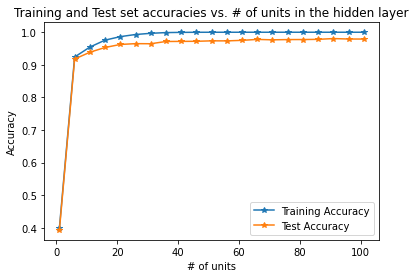

In [14]:
plt.plot(possible_unit_numbers, trainacc_vs_unitnumber, '-*', label = "Training Accuracy")
plt.plot(possible_unit_numbers, testacc_vs_unitnumber, '-*', label = "Test Accuracy")
# naming the x axis 
plt.xlabel('# of units') 
# naming the y axis 
plt.ylabel('Accuracy') 
# giving a title to my graph 
plt.title('Training and Test set accuracies vs. # of units in the hidden layer')
# show a legend on the plot 
plt.legend() 
# function to show the plot 
plt.show()

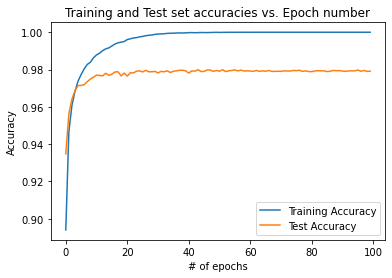

In [15]:
plt.plot(training_acc, label = "Training Accuracy")
plt.plot(test_acc, label = "Test Accuracy")
# naming the x axis 
plt.xlabel('# of epochs') 
# naming the y axis 
plt.ylabel('Accuracy')
# giving a title to my graph 
plt.title('Training and Test set accuracies vs. Epoch number')
# show a legend on the plot 
plt.legend() 
# function to show the plot 
plt.show()

In [ ]:
# reporting of the results
score = model_multilayer.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
del model_multilayer